# Install

In [ ]:
!pip install scikeras

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.4/13.4 MB 106.4 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.3.2
    Uninstalling scikit-learn-1.3.2:
      Successfully uninstalled scikit-learn-1.3.2


In [ ]:
from sklearn.model_selection import GridSearchCV
from scikeras.wrappers import KerasClassifier

# Fashion MNIST та базове тренування

**Fashion MNIST** — це датасет, що складається з 70 000 зображень одягу (28x28 пікселів у градаціх сірого) та їх відповідних міток (10 класів). Це аналог датасету MNIST, але він складніший для класифікації, оскільки зображення одягу більш різноманітні, ніж рукописні цифри.

**Класи Fashion MNIST:**

- 0: Футболка/топ
- 1: Штани
- 2: Светр
- 3: Сукня
- 4: Пальто
- 5: Сандалі
- 6: Сорочка
- 7: Кросівки
- 8: Сумка
- 9: Чоботи

In [ ]:
class_names = ['Футболка/топ', 'Штани', 'Светр', 'Сукня', 'Пальто', 'Сандалі', 'Сорочка', 'Кросівки', 'Сумка', 'Чоботи']

In [ ]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

# Завантаження Fashion MNIST
(x_train, y_train), (x_test, y_test) = keras.datasets.fashion_mnist.load_data()

# Розміри датасету
print("Розмір тренувальної вибірки:", x_train.shape)
print("Розмір тестової вибірки:", x_test.shape)

# Перевірка унікальних значень міток
print("Унікальні мітки:", np.unique(y_train))

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
Розмір тренувальної вибірки: (60000, 28, 28)
Розмір тестової вибірки: (10000, 28, 28)
Унікальні мітки: [0 1 2 3 4 5 6 7 8 9]


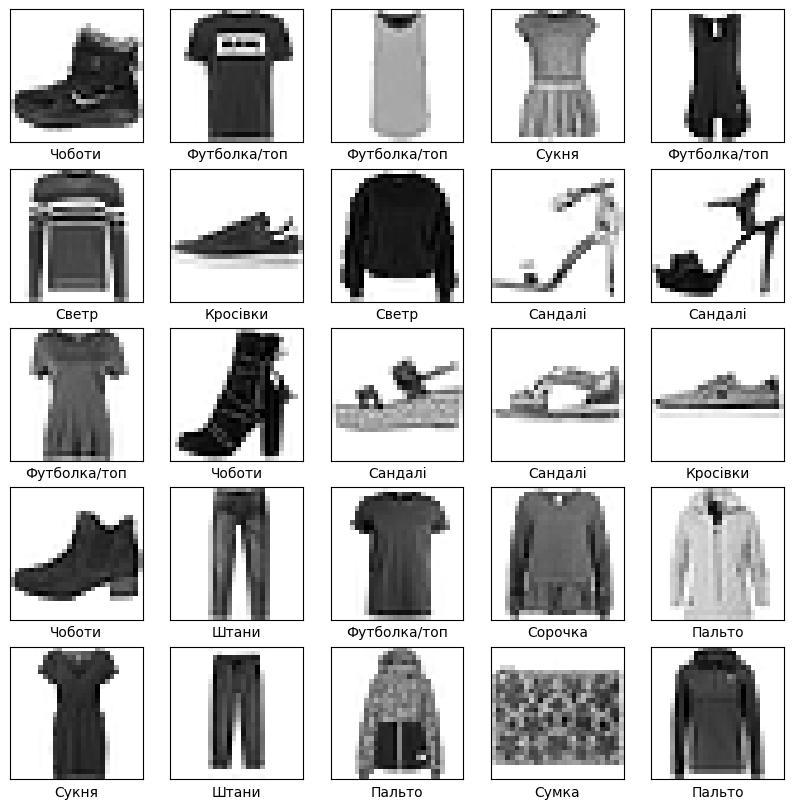

In [ ]:
# Виведення кількох зображень з датасету
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[y_train[i]])
plt.show()

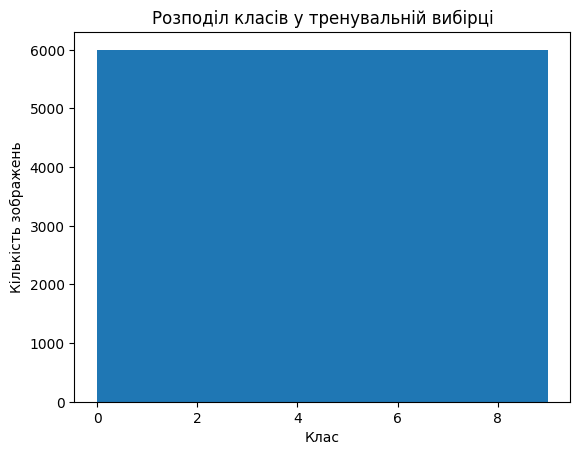

In [ ]:
# Побудова гістограми розподілу класів
plt.hist(y_train)
plt.xlabel("Клас")
plt.ylabel("Кількість зображень")
plt.title("Розподіл класів у тренувальній вибірці")
plt.show()

In [ ]:
# Нормалізація пікселів до діапазону [0, 1]
x_train = x_train / 255.0
x_test = x_test / 255.0

In [ ]:
# Перетворення міток в one-hot encoding для використання з categorical_crossentropy
y_train = keras.utils.to_categorical(y_train, num_classes=10)
y_test = keras.utils.to_categorical(y_test, num_classes=10)

## Побудова та тренування базової нейронної мережі

https://www.tensorflow.org/api_docs/python/tf/keras/Model

In [ ]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)




- keras.layers.Flatten: перетворює зображення 28x28 в вектор розмірності 784.
- keras.layers.Dense: повністю зв'язний шар.
 - Перший шар має 128 нейронів та функцію активації ReLU.
 - Другий шар (вихідний) має 10 нейронів (за кількістю класів) та функцію активації softmax для отримання ймовірностей класів.

In [ ]:
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)



- optimizer='adam': використовуємо оптимізатор Adam для оновлення ваг мережі.
- loss='categorical_crossentropy': використовуємо функцію втрат categorical crossentropy, яка підходить для задач багатокласової класифікації.
- metrics=['accuracy']: відслідковуємо метрику accuracy (точність) під час тренування.

In [ ]:
history = model.fit(x_train, y_train, epochs=10, validation_split=0.2)

Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.7720 - loss: 0.6619 - val_accuracy: 0.8543 - val_loss: 0.4146
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8605 - loss: 0.3949 - val_accuracy: 0.8645 - val_loss: 0.3878
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8735 - loss: 0.3473 - val_accuracy: 0.8685 - val_loss: 0.3631
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8813 - loss: 0.3240 - val_accuracy: 0.8817 - val_loss: 0.3335
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8879 - loss: 0.3015 - val_accuracy: 0.8742 - val_loss: 0.3493
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8947 - loss: 0.2838 - val_accuracy: 0.8796 - val_loss: 0.3394
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9003 - loss: 0.2733 - val_accuracy: 0.8812 - val_loss: 0.3342
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9052 - loss: 0.2604 - 

- epochs=10: тренуємо модель протягом 10 епох.
- validation_split=0.2: виділяємо 20% тренувальних даних для валідації.

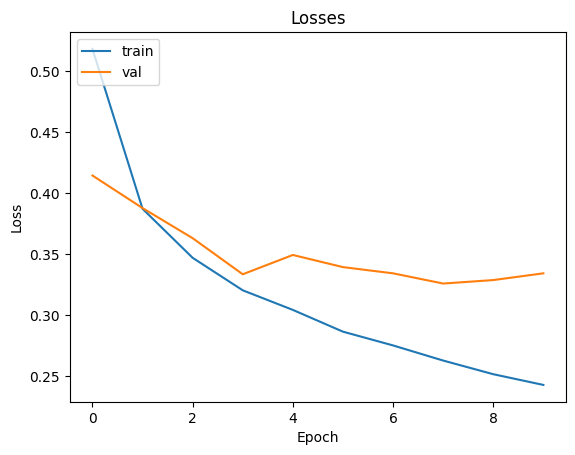

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Losses')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

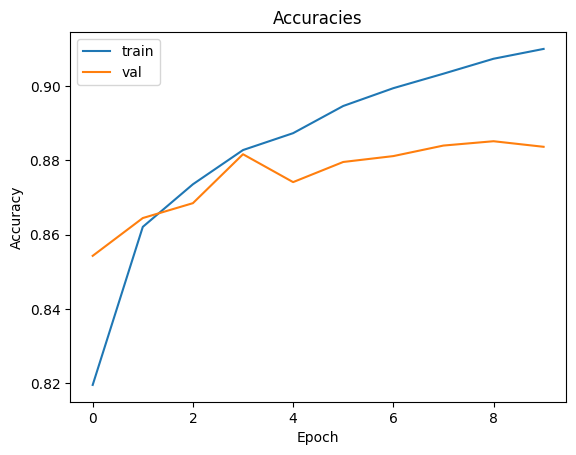

In [ ]:
# Побудова графіків кривих навчання
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Accuracies')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

# Рання зупинка

In [ ]:
def reinit_model():
    model = keras.Sequential([
        keras.layers.Flatten(input_shape=(28, 28)),
        keras.layers.Dense(128, activation='relu'),
        keras.layers.Dense(10, activation='softmax')
    ])

    model.compile(
        optimizer='adam',
        loss='categorical_crossentropy',
        metrics=['accuracy']
    )

    return model

**Рання зупинка** — це техніка, яка зупиняє тренування, коли модель перестає покращуватися на валідаційних даних. Це допомагає запобігти перенавчанню.

In [ ]:
model = reinit_model()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

# Створення callback'у ранньої зупинки
early_stopping = EarlyStopping(monitor='val_loss', patience=4)

# Тренування моделі з ранньою зупинкою
history_es = model.fit(
    x_train, y_train, epochs=20,
    validation_split=0.2,
    callbacks=[early_stopping]
)

Epoch 1/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.7696 - loss: 0.6648 - val_accuracy: 0.8494 - val_loss: 0.4260
Epoch 2/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - accuracy: 0.8582 - loss: 0.3972 - val_accuracy: 0.8581 - val_loss: 0.4051
Epoch 3/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8718 - loss: 0.3481 - val_accuracy: 0.8723 - val_loss: 0.3585
Epoch 4/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8846 - loss: 0.3174 - val_accuracy: 0.8779 - val_loss: 0.3392
Epoch 5/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8898 - loss: 0.2990 - val_accuracy: 0.8740 - val_loss: 0.3456
Epoch 6/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8976 - loss: 0.2795 - val_accuracy: 0.8742 - val_loss: 0.3476
Epoch 7/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8989 - loss: 0.2700 - val_accuracy: 0.8757 - val_loss: 0.3468
Epoch 8/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9054 - loss: 0.2557 - 

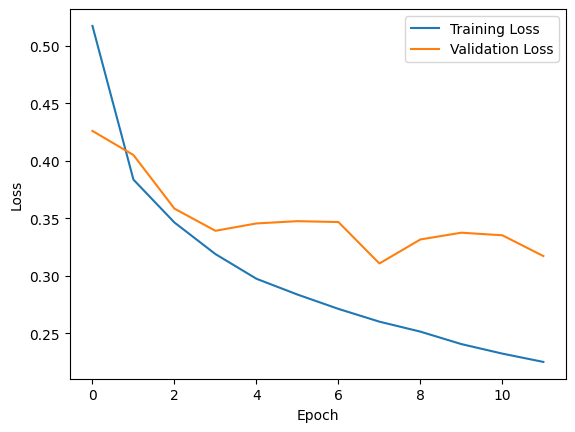

In [ ]:
# Візуалізація втрат на тренувальних та валідаційних даних
plt.plot(history_es.history['loss'], label='Training Loss')
plt.plot(history_es.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

EarlyStopping: створює callback ранньої зупинки, який відслідковує val_loss (втрати на валідаційних даних) та зупиняє тренування, якщо значення не покращується протягом 3 епох (patience=3).

# Кількість шарів та нейронів

In [ ]:
gpus = tf.config.list_physical_devices('GPU')
if gpus:
  try:
    # Currently, memory growth needs to be the same across GPUs
    for gpu in gpus:
      tf.config.experimental.set_memory_growth(gpu, True)
    logical_gpus = tf.config.list_logical_devices('GPU')
    print(len(gpus), "Physical GPUs,", len(logical_gpus), "Logical GPUs")
  except RuntimeError as e:
    # Memory growth must be set before GPUs have been initialized
    print(e)

Physical devices cannot be modified after being initialized


Кількість шарів та нейронів впливає на складність та здатність моделі до навчання. Більше шарів та нейронів дозволяє моделі вивчати складніші залежності, але також збільшує ризик перенавчання та потребує більше обчислювальних ресурсів.

In [ ]:
from tensorflow.keras import regularizers

In [ ]:
def create_model_with_hparams(
    hidden_layers: int = 2,
    hidden_units: int = 128,
    hidden_activation: str = "relu",
    kernel_initializer: str = "he_normal",
    use_l2: bool = False, use_dropout: bool = False,
    optimizer: str = "adam",
):
    model = keras.Sequential()
    model.add(keras.layers.Flatten(input_shape=(28, 28)))

    for _ in range(hidden_layers):
        model.add(keras.layers.Dense(
            hidden_units,
            activation=hidden_activation,
            kernel_initializer=kernel_initializer,
            kernel_regularizer=(regularizers.l2() if use_l2 else None)
        ))
        if use_dropout:
            model.add(keras.layers.Dropout(0.5))
    model.add(keras.layers.Dense(10, activation='softmax'))

    model.compile(
        optimizer=optimizer,
        loss='categorical_crossentropy',
        metrics=['accuracy']
    )

    return model

In [ ]:
s_model = create_model_with_hparams(hidden_layers=1, hidden_units=32)
m_model = create_model_with_hparams(hidden_layers=2, hidden_units=64)
l_model = create_model_with_hparams(hidden_layers=3, hidden_units=128)
xl_model = create_model_with_hparams(hidden_layers=5, hidden_units=256)

In [ ]:
models_histories = {}
for model, model_name in zip(
    [s_model, m_model, l_model, xl_model],
    ["s_model", "m_model", "l_model", "xl_model"]
):
    print(f"Training {model_name}...")
    history = model.fit(
        x_train, y_train, epochs=10,
        validation_split=0.2,
    )
    models_histories[model_name] = history

Training s_model...
Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.7371 - loss: 0.7730 - val_accuracy: 0.8360 - val_loss: 0.4688
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8449 - loss: 0.4391 - val_accuracy: 0.8580 - val_loss: 0.4047
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8607 - loss: 0.3961 - val_accuracy: 0.8400 - val_loss: 0.4327
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8677 - loss: 0.3697 - val_accuracy: 0.8651 - val_loss: 0.3738
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.8733 - loss: 0.3507 - val_accuracy: 0.8691 - val_loss: 0.3656
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8775 - loss: 0.3371 - val_accuracy: 0.8688 - val_loss: 0.3656
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8822 - loss: 0.3252 - val_accuracy: 0.8677 - val_loss: 0.3687
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.88

In [ ]:
def plot_histories_dict(histories_dict):
    # train
    plt.figure(figsize=(12, 6))

    for name, history in histories_dict.items():
        plt.subplot(1, 2, 1)
        plt.plot(history.history['loss'], label=f'{name} - Train Loss')
        plt.xlabel('Epoch')
        plt.ylabel('Loss')
        plt.title('Loss')
        plt.legend()

        plt.subplot(1, 2, 2)
        plt.plot(history.history['accuracy'], label=f'{name} - Train Accuracy')
        plt.xlabel('Epoch')
        plt.ylabel('Accuracy')
        plt.title('Accuracy')
        plt.suptitle('TRAIN Losses and Accuracies')
        plt.legend()

    plt.tight_layout()
    plt.show()

    # validation
    plt.figure(figsize=(12, 6))

    for name, history in histories_dict.items():
        plt.subplot(1, 2, 1)
        plt.plot(history.history['val_loss'], label=f'{name} - Val Loss')
        plt.xlabel('Epoch')
        plt.ylabel('Loss')
        plt.title('Loss')
        plt.legend()

        plt.subplot(1, 2, 2)
        plt.plot(history.history['val_accuracy'], label=f'{name} - Val Accuracy')
        plt.xlabel('Epoch')
        plt.ylabel('Accuracy')
        plt.title('Accuracy')
        plt.suptitle('VALIDATION Losses and Accuracies')
        plt.legend()

    plt.tight_layout()
    plt.show()

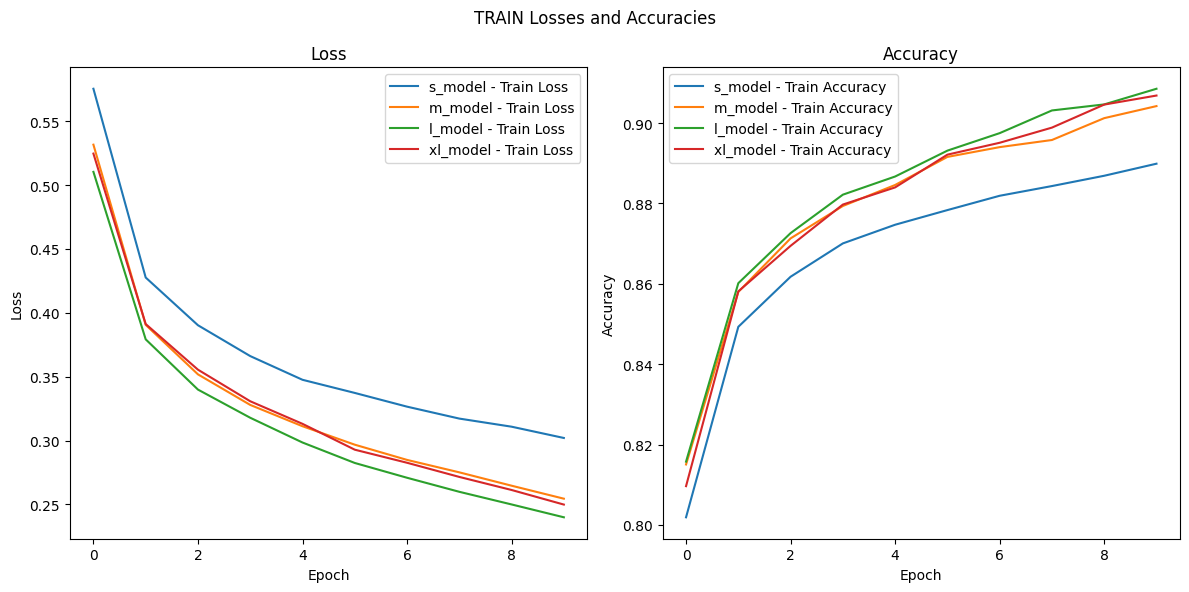

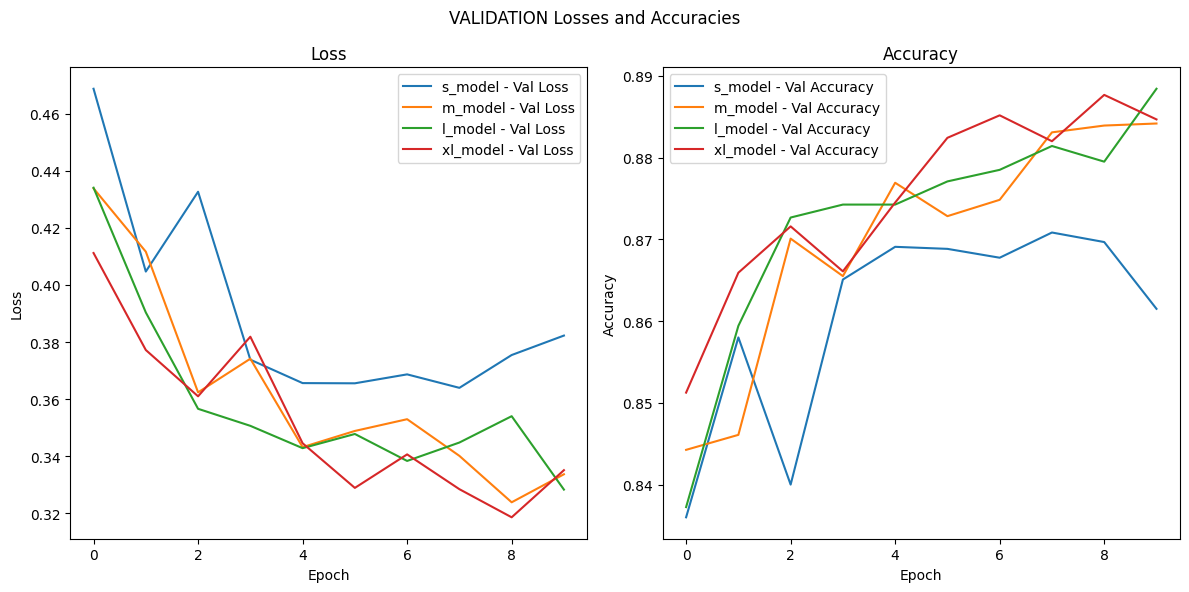

In [ ]:
plot_histories_dict(models_histories)

In [ ]:
# Оцінка моделей на тестових даних
for model_name, model in zip(
    ["s_model", "m_model", "l_model", "xl_model"],
    [s_model, m_model, l_model, xl_model]
):
    loss, accuracy = model.evaluate(x_test, y_test, verbose=0)
    print(f'{model_name} - Test Loss: {loss:.4f}, Test Accuracy: {accuracy:.4f}')

s_model - Test Loss: 0.4069, Test Accuracy: 0.8509
m_model - Test Loss: 0.3608, Test Accuracy: 0.8739
l_model - Test Loss: 0.3495, Test Accuracy: 0.8811
xl_model - Test Loss: 0.3640, Test Accuracy: 0.8795


Слід експериментувати з різними конфігураціями шарів та нейронів, щоб знайти оптимальну архітектуру для конкретної задачі, враховуючи баланс між складністю моделі та її здатністю до узагальнення.

# Функції активації та ініціалізація

Функція активації вводить нелінійність в модель, дозволяючи їй вивчати складні залежності між входами та виходами.

Популярні функції активації:

- *ReLU (Rectified Linear Unit)*: $f(x) = max(0, x)$ - проста та ефективна функція, яка вирішує проблему "затухання градієнта".
- *Sigmoid*: $f(x) = \frac{1}{1 + e^{-x}}$ - використовується для отримання ймовірностей на виході, але може страждати від "затухання градієнта".
- *Tanh (Hyperbolic Tangent)*: $f(x) = \frac{e^x - e^{-x}}{e^x + e^{-x}}$ - подібна до Sigmoid, але вихідні значення центровані навколо 0.

https://keras.io/api/layers/activation_layers/

In [ ]:
activations_histories = {}
for activation in ["relu", "sigmoid", "tanh"]:
    print(f"Training with {activation} activation...")
    model = create_model_with_hparams(
        hidden_layers=2, hidden_units=64, hidden_activation=activation
    )
    history = model.fit(
        x_train, y_train, epochs=10,
        validation_split=0.2,
    )
    activations_histories[activation] = history

Training with relu activation...


/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.7493 - loss: 0.7227 - val_accuracy: 0.8522 - val_loss: 0.4227
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8571 - loss: 0.3992 - val_accuracy: 0.8635 - val_loss: 0.3783
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8722 - loss: 0.3502 - val_accuracy: 0.8555 - val_loss: 0.3924
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8801 - loss: 0.3301 - val_accuracy: 0.8718 - val_loss: 0.3561
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8835 - loss: 0.3134 - val_accuracy: 0.8752 - val_loss: 0.3493
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8920 - loss: 0.2905 - val_accuracy: 0.8812 - val_loss: 0.3313
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8955 - loss: 0.2793 - val_accuracy: 0.8762 - val_loss: 0.3424
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8998 - loss: 0.2706 - 

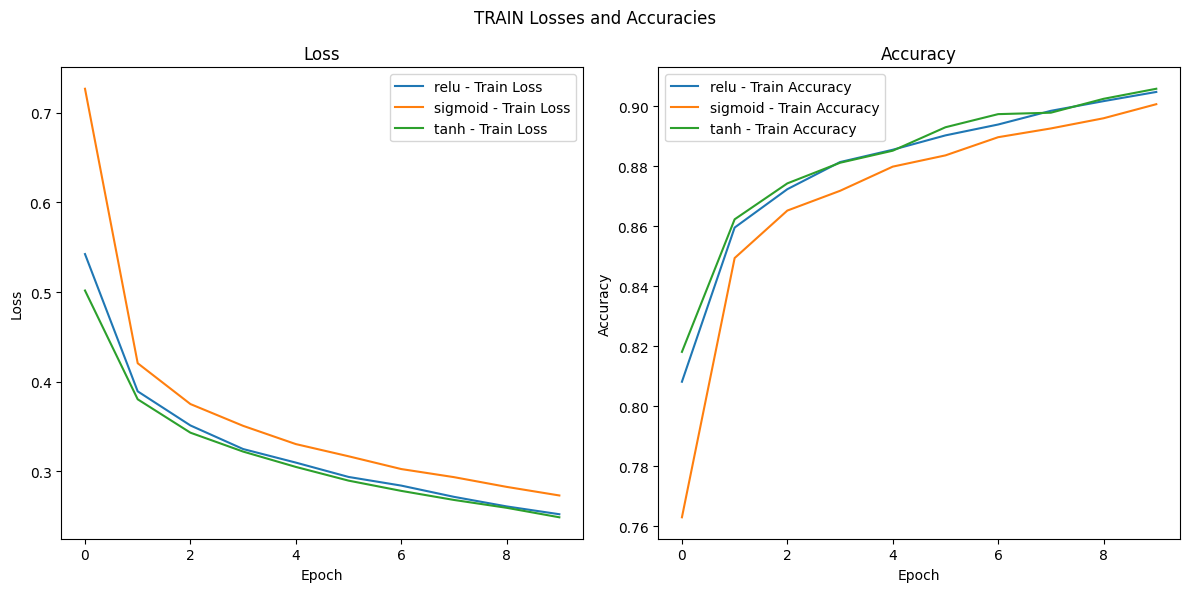

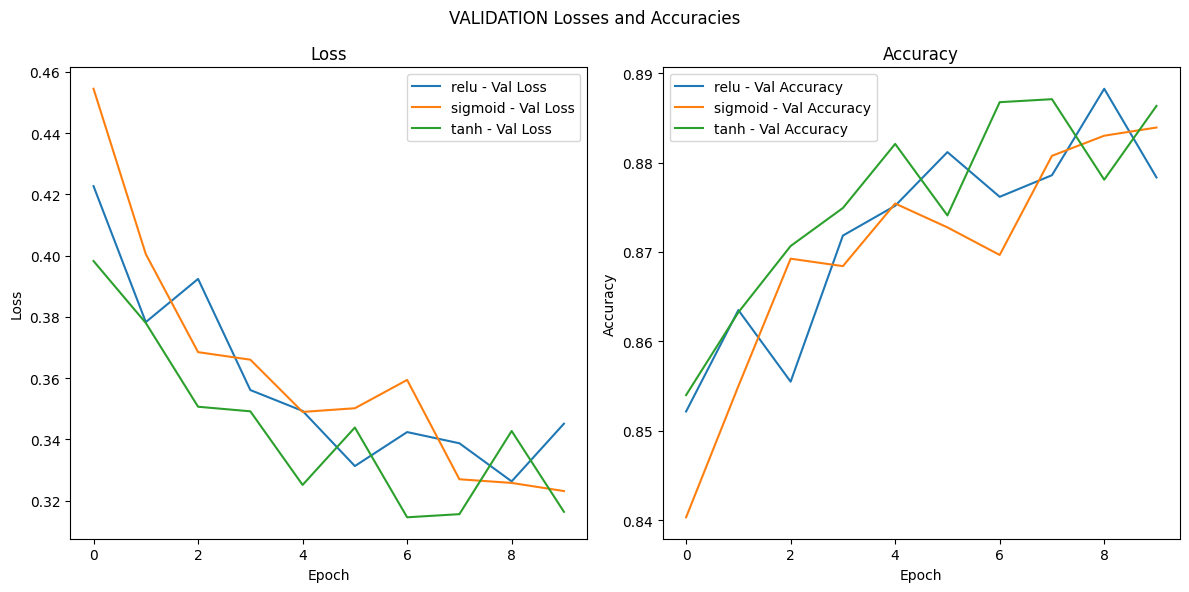

In [ ]:
plot_histories_dict(activations_histories)

# Ініціалізація ваг

Ініціалізація ваг впливає на швидкість та стабільність навчання.

**Популярні методи ініціалізації:**

- Xavier/Glorot: ініціалізує ваги з розподілу, що залежить від кількості вхідних та вихідних нейронів шару, допомагаючи уникнути "вибуху" або "затухання" градієнтів.
- He: подібний до Xavier, але враховує функцію активації ReLU, забезпечуючи кращу ініціалізацію для мереж з ReLU.

https://keras.io/api/layers/initializers/

In [ ]:
initializer_histories = {}
for initializer in ["random_normal", "glorot_normal", "he_normal"]:
    print(f"Training with {initializer} initializer...")
    model = create_model_with_hparams(
        hidden_layers=2, hidden_units=64, hidden_activation="relu",
        kernel_initializer=initializer
    )
    history = model.fit(
        x_train, y_train, epochs=10,
        validation_split=0.2,
    )
    initializer_histories[initializer] = history

Training with random_normal initializer...
Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7369 - loss: 0.7525 - val_accuracy: 0.8533 - val_loss: 0.4142
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8549 - loss: 0.3974 - val_accuracy: 0.8699 - val_loss: 0.3657
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8691 - loss: 0.3581 - val_accuracy: 0.8692 - val_loss: 0.3603
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8807 - loss: 0.3286 - val_accuracy: 0.8719 - val_loss: 0.3505
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8854 - loss: 0.3064 - val_accuracy: 0.8832 - val_loss: 0.3290
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8925 - loss: 0.2918 - val_accuracy: 0.8742 - val_loss: 0.3451
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8945 - loss: 0.2865 - val_accuracy: 0.8709 - val_loss: 0.3581
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 2m

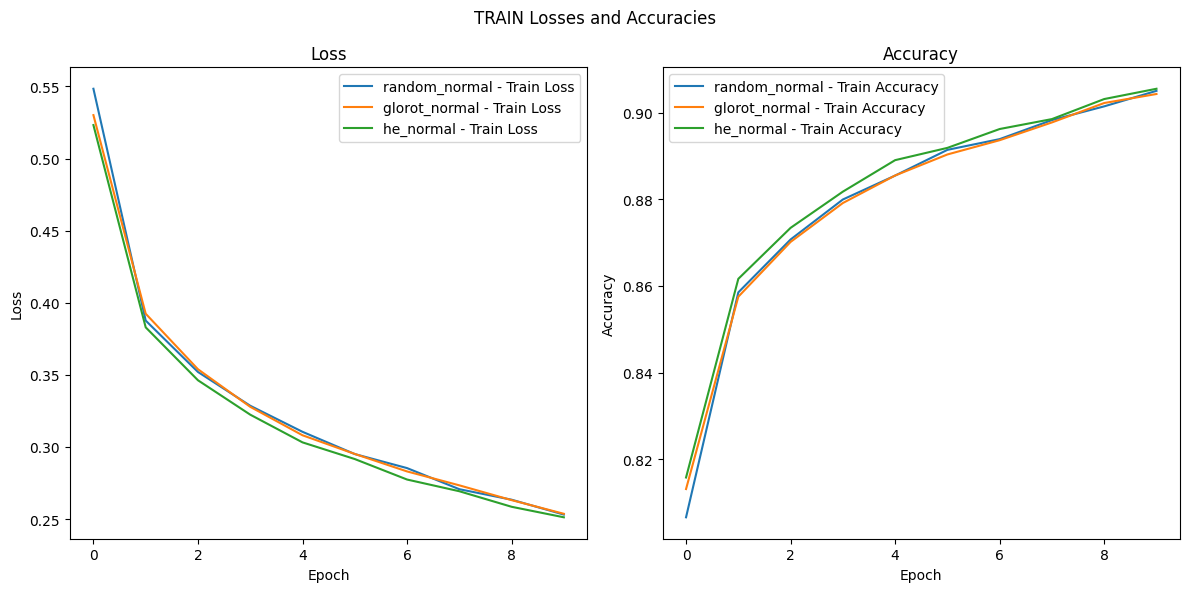

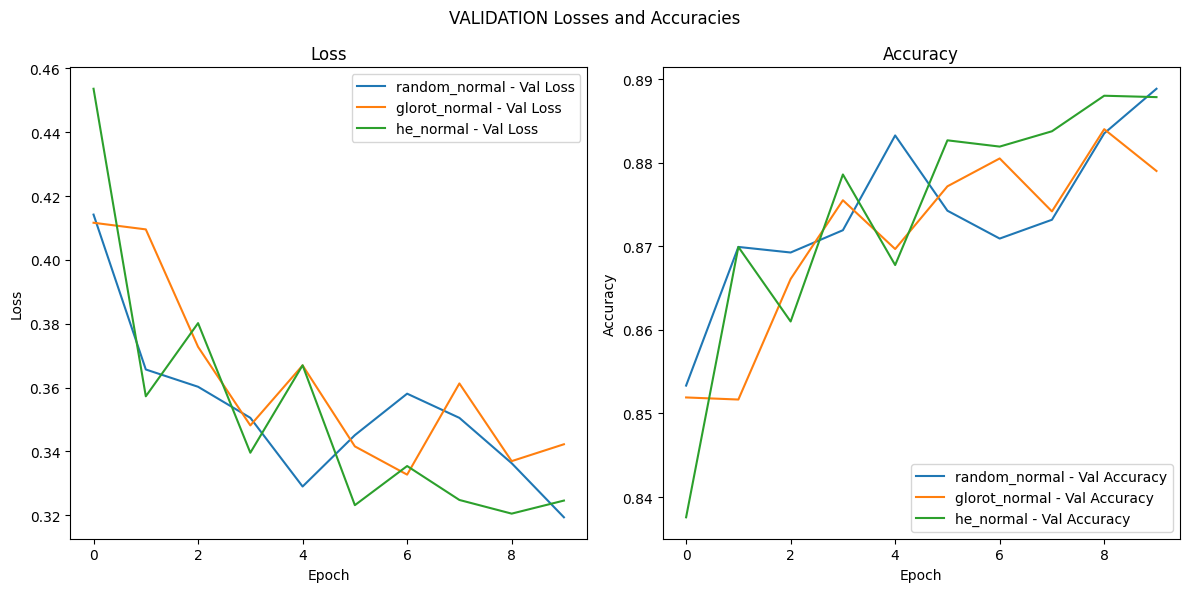

In [ ]:
plot_histories_dict(initializer_histories)

# Кількість епох та розмір батчу

**Епоха** — це один прохід по всіх тренувальних даних. Більша кількість епох може покращити точність моделі, але також збільшує ризик перенавчання та час тренування.


**Батч** — це підмножина тренувальних даних, яка використовується для оновлення ваг моделі за один крок.

- Менший розмір батчу (наприклад, 16, 32): призводить до більш частих оновлень ваг, що може пришвидшити навчання та покращити збіжність, але робить тренування більш шумним та може потребувати більше пам'яті.
- Більший розмір батчу (наприклад, 64, 128): призводить до менш частих, але більш стабільних оновлень ваг, що може покращити ефективність використання обчислювальних ресурсів, але може сповільнити навчання.

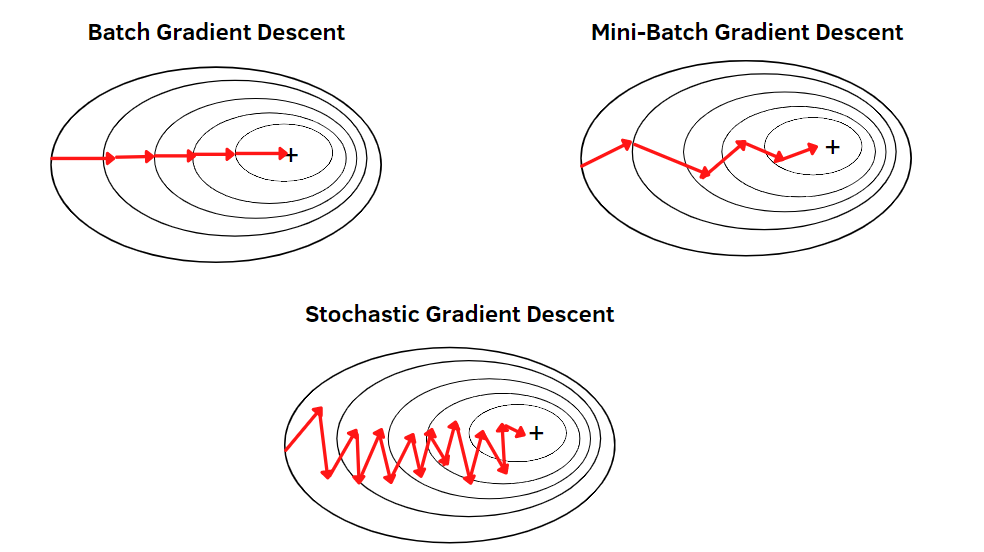

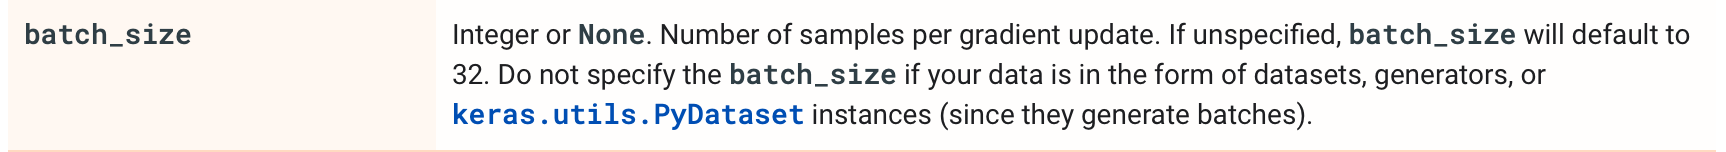

In [ ]:
bs_histories = {}
for bs in [64, 256, 1024, 4096]:
    print(f"Training with {bs} batch size...")
    model = create_model_with_hparams(
        hidden_layers=2, hidden_units=64,
        hidden_activation="relu",
        kernel_initializer="he_normal"
    )
    history = model.fit(
        x_train, y_train,
        epochs=10, batch_size=bs,
        validation_split=0.2,
    )
    bs_histories[bs] = history

Training with 64 batch size...


/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.7260 - loss: 0.7848 - val_accuracy: 0.8384 - val_loss: 0.4542
Epoch 2/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8552 - loss: 0.4063 - val_accuracy: 0.8622 - val_loss: 0.3818
Epoch 3/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8688 - loss: 0.3660 - val_accuracy: 0.8692 - val_loss: 0.3665
Epoch 4/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8775 - loss: 0.3363 - val_accuracy: 0.8798 - val_loss: 0.3408
Epoch 5/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8847 - loss: 0.3132 - val_accuracy: 0.8727 - val_loss: 0.3462
Epoch 6/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8919 - loss: 0.2935 - val_accuracy: 0.8708 - val_loss: 0.3468
Epoch 7/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8913 - loss: 0.2916 - val_accuracy: 0.8800 - val_loss: 0.3360
Epoch 8/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8988 - loss: 0.2731 - val_accuracy: 0.

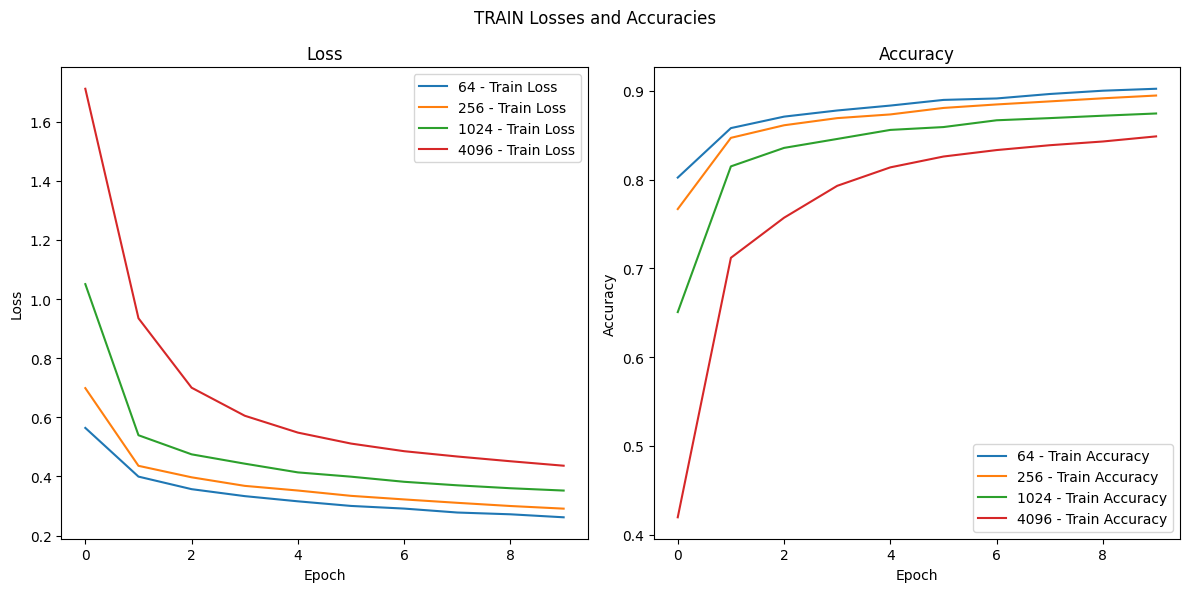

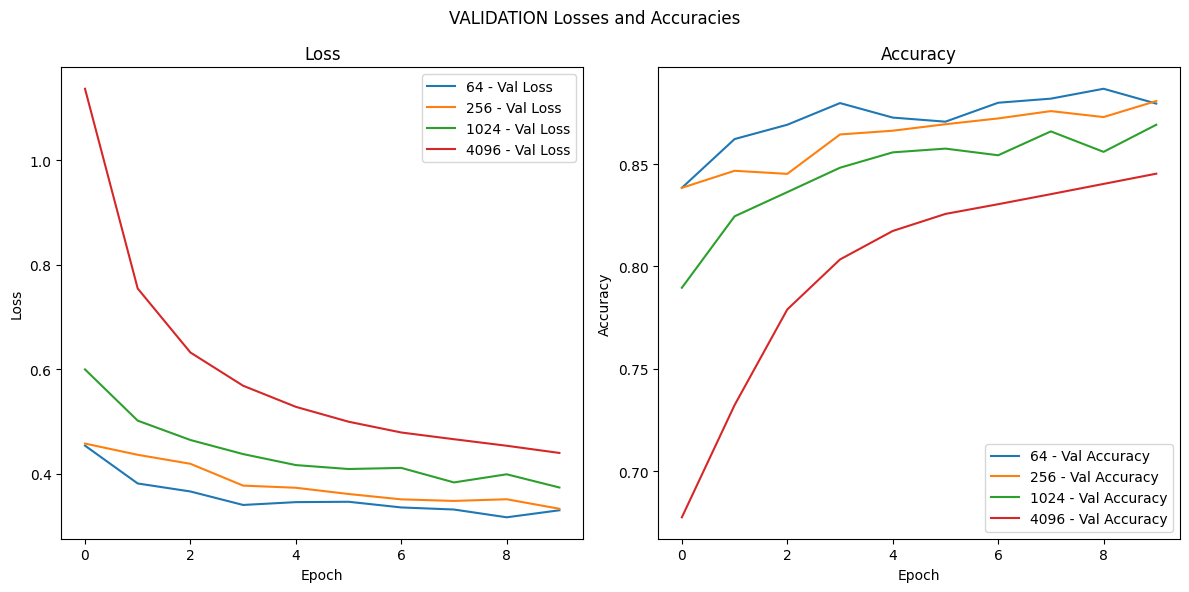

In [ ]:
plot_histories_dict(bs_histories)

# Регуляризація

**Регуляризація** — це техніка, яка допомагає запобігти перенавчанню шляхом додавання штрафів до функції втрат або модифікації процесу навчання.

**L1 та L2 регуляризація:**

- **L1**: додає штраф, пропорційний сумі абсолютних значень ваг: $L1 = \lambda \sum_i |w_i|$. Сприяє зменшенню менш важливих ваг до нуля, що призводить до розрідженої моделі.
- **L2**: додає штраф, пропорційний сумі квадратів ваг: $L2 = \lambda \sum_i w_i^2$. Сприяє зменшенню всіх ваг, запобігаючи домінуванню окремих ваг та перенавчанню.

**Dropout:**

Dropout випадково вимикає нейрони під час тренування з певною ймовірністю (dropout rate). Це змушує мережу вивчати більш стійкі ознаки, оскільки вона не може покладатися на окремі нейрони.

https://keras.io/api/layers/regularizers/

In [ ]:
reg_histories = {}

# no regularization
reg = "<no regularization>"
print(f"Training with {reg}...")
model = create_model_with_hparams(
    hidden_layers=2, hidden_units=64,
    hidden_activation="relu",
    kernel_initializer="he_normal"
)
history = model.fit(
    x_train, y_train,
    epochs=10, batch_size=64,
    validation_split=0.2,
)
reg_histories[reg] = history

# l2
reg = "<l2 regularization>"
print(f"Training with {reg}...")
model = create_model_with_hparams(
    hidden_layers=2, hidden_units=64,
    hidden_activation="relu",
    kernel_initializer="he_normal",
    use_l2=True
)
history = model.fit(
    x_train, y_train,
    epochs=10, batch_size=64,
    validation_split=0.2,
)
reg_histories[reg] = history

# l2 and dropout
reg = "<l2 and dropout regularizations>"
print(f"Training with {reg}...")
model = create_model_with_hparams(
    hidden_layers=2, hidden_units=64,
    hidden_activation="relu",
    kernel_initializer="he_normal",
    use_l2=True, use_dropout=True
)
history = model.fit(
    x_train, y_train,
    epochs=10, batch_size=64,
    validation_split=0.2,
)
reg_histories[reg] = history


Training with <no regularization>...
Epoch 1/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.7368 - loss: 0.7624 - val_accuracy: 0.8338 - val_loss: 0.4548
Epoch 2/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8541 - loss: 0.4087 - val_accuracy: 0.8626 - val_loss: 0.3843
Epoch 3/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8709 - loss: 0.3560 - val_accuracy: 0.8629 - val_loss: 0.3700
Epoch 4/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8756 - loss: 0.3376 - val_accuracy: 0.8645 - val_loss: 0.3757
Epoch 5/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8840 - loss: 0.3156 - val_accuracy: 0.8724 - val_loss: 0.3505
Epoch 6/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8924 - loss: 0.2925 - val_accuracy: 0.8728 - val_loss: 0.3527
Epoch 7/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8918 - loss: 0.2923 - val_accuracy: 0.8750 - val_loss: 0.3483
Epoch 8/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8

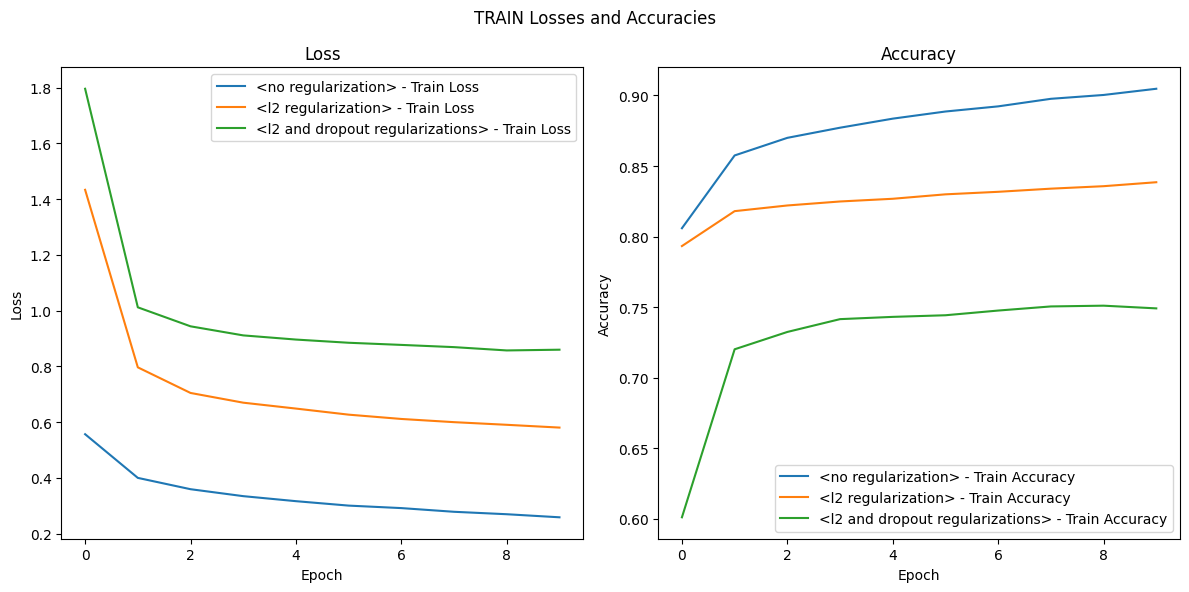

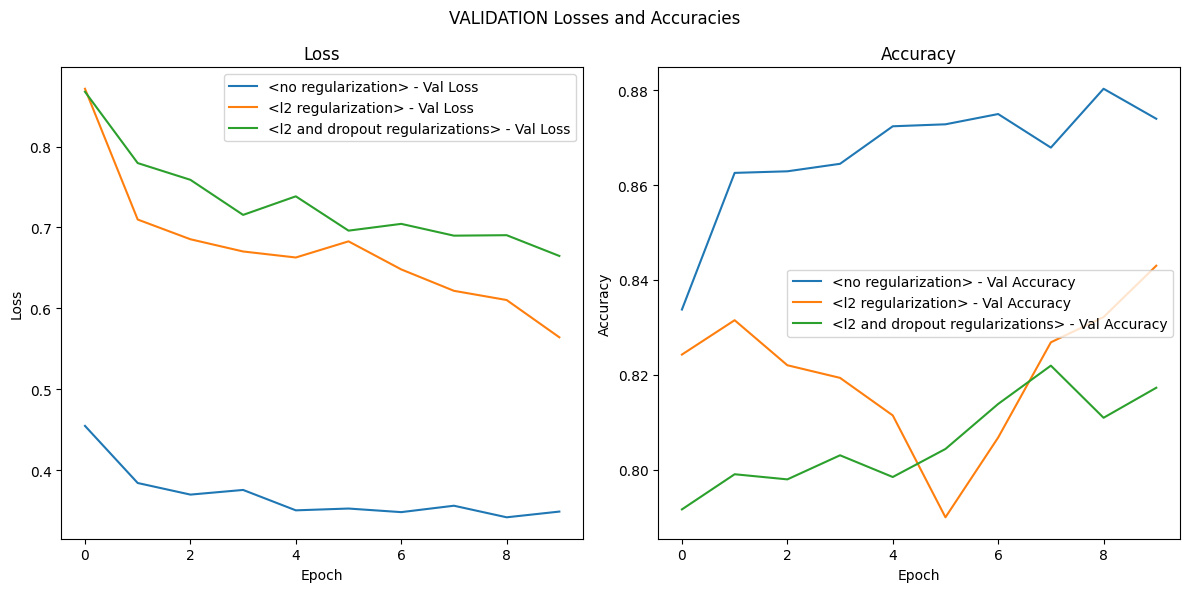

In [ ]:
plot_histories_dict(reg_histories)

# Вибір оптимізатора

**Оптимізатор** — це алгоритм, який оновлює ваги моделі з метою мінімізації функції втрат. Вибір оптимізатора може значно вплинути на швидкість та якість навчання.

**Популярні оптимізатори:**

- SGD (Stochastic Gradient Descent): оновлює ваги в напрямку градієнта функції втрат, обчисленого на батчі даних. Може бути повільним та застрягати в локальних мінімумах.
- SGD with Momentum: додає "інерцію" до оновлення ваг, що дозволяє йому "проскочити" локальні мінімуми та пришвидшити збіжність.
- Adam (Adaptive Moment Estimation): адаптує швидкість навчання для кожної ваги на основі минулих градієнтів та їх квадратів. Зазвичай є гарним вибором для багатьох задач.
- RMSprop (Root Mean Square Propagation): подібний до Adam, але використовує інший спосіб адаптації швидкості навчання. Також є гарним вибором.

https://keras.io/api/optimizers/

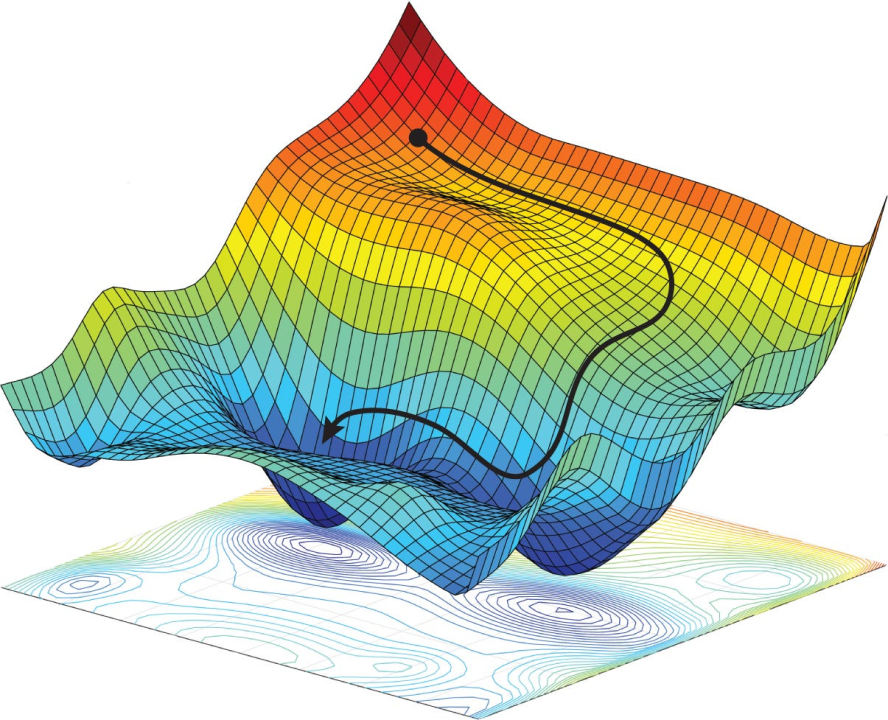

https://towardsdatascience.com/a-visual-explanation-of-gradient-descent-methods-momentum-adagrad-rmsprop-adam-f898b102325c

https://github.com/christianwaldmann/optimizer-visualization

In [ ]:
optimizer_histories = {}
for optimizer in ["sgd", "adagrad", "rmsprop", "adam"]:
    print(f"Training with {optimizer} optimizer...")
    model = create_model_with_hparams(
        hidden_layers=2, hidden_units=64,
        hidden_activation="relu",
        kernel_initializer="he_normal",
        optimizer=optimizer
    )
    history = model.fit(
        x_train, y_train,
        epochs=10, batch_size=bs,
        validation_split=0.2,
    )
    optimizer_histories[optimizer] = history

Training with sgd optimizer...
Epoch 1/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 96ms/step - accuracy: 0.0984 - loss: 2.4467 - val_accuracy: 0.1699 - val_loss: 2.2833
Epoch 2/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.1904 - loss: 2.2497 - val_accuracy: 0.2431 - val_loss: 2.1453
Epoch 3/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.2546 - loss: 2.1165 - val_accuracy: 0.2913 - val_loss: 2.0204
Epoch 4/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.2988 - loss: 1.9959 - val_accuracy: 0.3627 - val_loss: 1.9051
Epoch 5/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.3811 - loss: 1.8803 - val_accuracy: 0.4412 - val_loss: 1.7925
Epoch 6/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.4566 - loss: 1.7705 - val_accuracy: 0.4986 - val_loss: 1.6855
Epoch 7/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.5032 - loss: 1.6696 - val_accuracy: 0.5374 - val_loss: 1.5879
Epoch 8/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.5419 - loss: 1.5

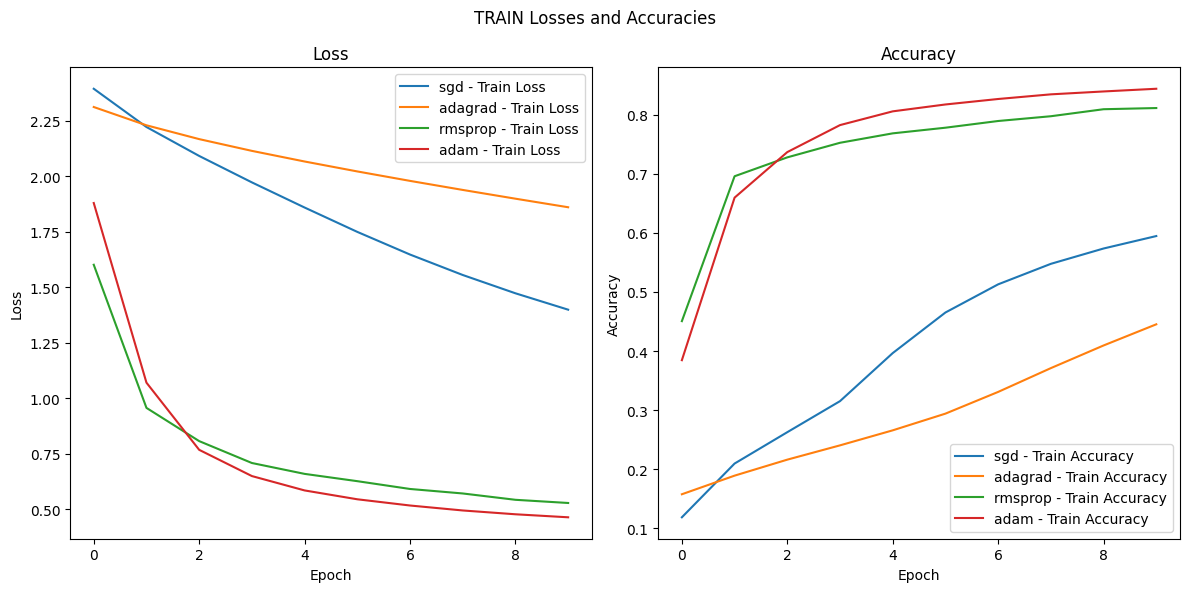

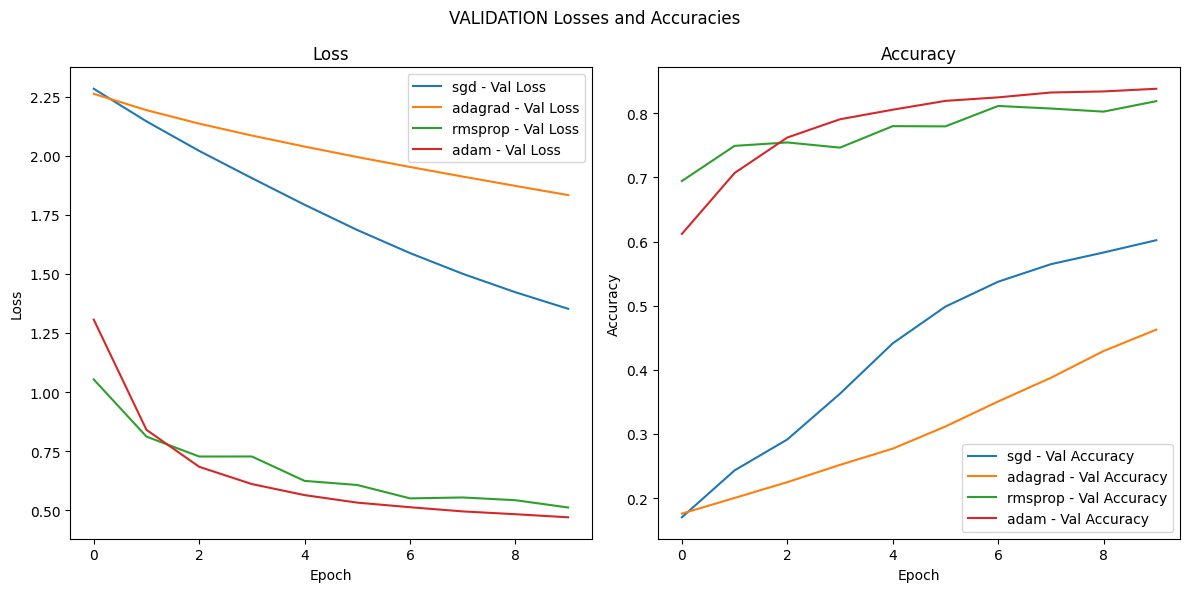

In [ ]:
plot_histories_dict(optimizer_histories)

# Автоматичний підбір гіперпараметрів

**GridSearchCV з бібліотеки sklearn** дозволяє автоматично знаходити оптимальні значення гіперпараметрів шляхом перебору заданого набору значень та оцінки якості моделі на валідаційних даних.

https://adriangb.com/scikeras/stable/migration.html

In [ ]:
# Створення об'єкту KerasClassifier
model = KerasClassifier(model=create_model_with_hparams, optimizer="adam", hidden_layers=2)
model.get_params().keys()

In [ ]:
# Визначення параметрів для перебору
param_grid = {
    'optimizer': ['adam', 'rmsprop'],
    'hidden_layers': [1, 3],
    # 'hidden_units': [32, 64],
    # 'hidden_activation': ['relu', 'tanh'],
    # 'kernel_initializer': ['he_normal', 'glorot_uniform']
}

# Створення об'єкту GridSearchCV
grid = GridSearchCV(estimator=model, param_grid=param_grid, cv=3)

# Запуск пошуку оптимальних параметрів
grid_result = grid.fit(x_train, y_train)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1250/1250 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.7719 - loss: 0.6721
625/625 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1250/1250 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7645 - loss: 0.6802
625/625 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1250/1250 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7699 - loss: 0.6725
625/625 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1250/1250 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.7682 - loss: 0.6769
625/625 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1250/1250 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.7580 - loss: 0.6925
625/625 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1250/1250 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.7596 - loss: 0.6908
625/625 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1250/1250 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7682 - loss: 0.6700
625/625 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1250/1250 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7543 - loss: 0.6966
625/625 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1250/1250 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7656 - loss: 0.6615
625/625 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1250/1250 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7626 - loss: 0.6733
625/625 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1250/1250 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.7500 - loss: 0.7031
625/625 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1250/1250 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.7652 - loss: 0.6770
625/625 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.7820 - loss: 0.6330
Best: 0.853350 using {'hidden_layers': 1, 'optimizer': 'adam'}


Після завершення пошуку гіперпараметрів за допомогою GridSearchCV, результати зберігаються в атрибуті cv_results_. Цей атрибут є словником, що містить детальну інформацію про кожну комбінацію гіперпараметрів, що перевірялася, та її результати на крос-валідації.

In [ ]:
grid_result.cv_results_

{'mean_fit_time': array([4.16204389, 3.5063893 , 5.31943242, 7.14085595]),
 'std_fit_time': array([0.54325981, 0.14054948, 1.19599504, 0.33171393]),
 'mean_score_time': array([1.41414356, 1.75399272, 1.41980505, 2.64855878]),
 'std_score_time': array([0.10686011, 0.73912018, 0.0871207 , 0.45274513]),
 'param_hidden_layers': masked_array(data=[1, 1, 3, 3],
              mask=[False, False, False, False],
        fill_value=999999),
 'param_optimizer': masked_array(data=['adam', 'rmsprop', 'adam', 'rmsprop'],
              mask=[False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'hidden_layers': 1, 'optimizer': 'adam'},
  {'hidden_layers': 1, 'optimizer': 'rmsprop'},
  {'hidden_layers': 3, 'optimizer': 'adam'},
  {'hidden_layers': 3, 'optimizer': 'rmsprop'}],
 'split0_test_score': array([0.8506 , 0.8336 , 0.8484 , 0.85195]),
 'split1_test_score': array([0.85555, 0.85635, 0.8476 , 0.8591 ]),
 'split2_test_score': array([0.8539, 0.8485, 0.8368, 0.

**Ключові елементи cv_results_:**

- params: список словників, де кожен словник представляє комбінацію гіперпараметрів, що тестувалася.
- mean_test_score: середнє значення метрики якості (наприклад, точності) на тестових фолдах крос-валідації для кожної комбінації гіперпараметрів.
- std_test_score: стандартне відхилення метрики якості на тестових фолдах крос-валідації для кожної комбінації гіперпараметрів.
- rank_test_score: ранг кожної комбінації гіперпараметрів за середнім значенням метрики якості (1 - найкращий результат).
- split<n>_test_score: значення метрики якості на кожному фолді крос-валідації для кожної комбінації гіперпараметрів (де <n> - номер фолду).

**Інтерпретація результатів:**

- mean_test_score дає загальне уявлення про те, наскільки добре кожна комбінація гіперпараметрів працює в середньому.
- std_test_score показує, наскільки стабільні результати для кожної комбінації на різних фолдах крос-валідації. Низьке стандартне відхилення вказує на більш стабільну модель.
- rank_test_score допомагає швидко визначити найкращі комбінації гіперпараметрів.
- split<n>_test_score дозволяє детальніше проаналізувати результати на кожному фолді та виявити потенційні проблеми, такі як нестабільність на окремих фолдах.

## Візуалізація результатів

In [ ]:
red_df = pd.DataFrame(grid_result.cv_results_)
red_df

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_hidden_layers,param_optimizer,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,4.162044,0.543260,1.414144,0.106860,1,adam,"{'hidden_layers': 1, 'optimizer': 'adam'}",0.85060,0.85555,0.8539,0.853350,0.002058,1
1,3.506389,0.140549,1.753993,0.739120,1,rmsprop,"{'hidden_layers': 1, 'optimizer': 'rmsprop'}",0.83360,0.85635,0.8485,0.846150,0.009435,3
2,5.319432,1.195995,1.419805,0.087121,3,adam,"{'hidden_layers': 3, 'optimizer': 'adam'}",0.84840,0.84760,0.8368,0.844267,0.005290,4
3,7.140856,0.331714,2.648559,0.452745,3,rmsprop,"{'hidden_layers': 3, 'optimizer': 'rmsprop'}",0.85195,0.85910,0.8387,0.849917,0.008451,2


In [ ]:
# Виведення найкращих параметрів та результатів
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

Best: 0.853350 using {'hidden_layers': 1, 'optimizer': 'adam'}


### Гістограма розподілу результатів на крос-валідації

Дозволяє візуально оцінити розкид результатів для кожної комбінації гіперпараметрів.

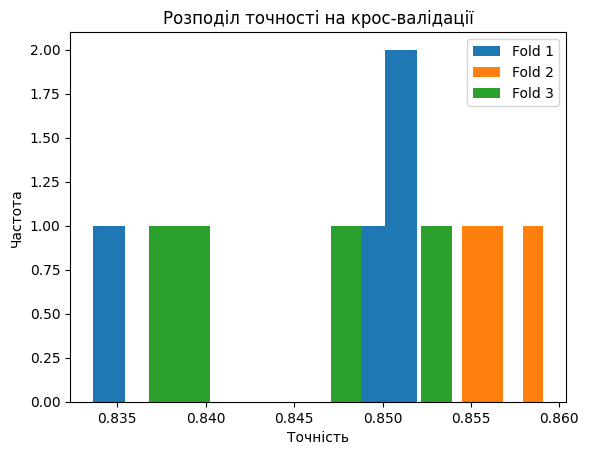

In [ ]:
for i in range(3):
    plt.hist(grid_result.cv_results_[f'split{i}_test_score'], label=f'Fold {i+1}')
plt.xlabel('Точність')
plt.ylabel('Частота')
plt.title('Розподіл точності на крос-валідації')
plt.legend()
plt.show()

### Boxplot для порівняння розподілу результатів для різних значень гіперпараметрів

Дозволяє порівняти розподіл метрики якості (медіана, квартилі, викиди) для різних значень одного гіперпараметра.

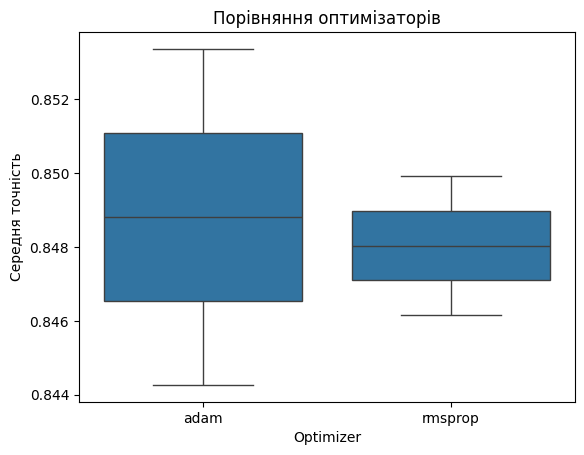

In [ ]:
sns.boxplot(x='param_optimizer', y='mean_test_score', data=red_df)
plt.xlabel('Optimizer')
plt.ylabel('Середня точність')
plt.title('Порівняння оптимізаторів')
plt.show()

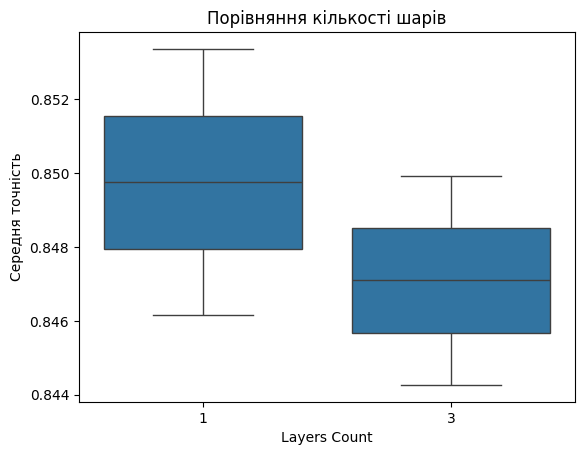

In [ ]:
sns.boxplot(x='param_hidden_layers', y='mean_test_score', data=red_df)
plt.xlabel('Layers Count')
plt.ylabel('Середня точність')
plt.title('Порівняння кількості шарів')
plt.show()

**Розподіл результатів на крос-валідації:**

- *Широкий розподіл*: вказує на те, що модель чутлива до вибору даних для тренування та валідації. Це може свідчити про перенавчання або недостатню кількість даних.
- *Вузький розподіл*: вказує на більш стабільну модель, яка менш чутлива до вибору даних для тренування та валідації.
- *Зміщення розподілу*: якщо розподіл на деяких фолдах зміщений в бік нижчих значень метрики, це може вказувати на проблеми з цими фолдами (наприклад, нерепрезентативна вибірка даних).

# Homework

https://complex-valued-neural-networks.readthedocs.io/en/stable/code_examples/fashion_mnist.html